# 問題2 学習と検証

In [2]:
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns



In [9]:
df = pd.read_csv('application_train.csv')

In [10]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#前処理
ohe_df = pd.get_dummies(df)

In [90]:
ohe_corr = ohe_df.corr()

In [86]:
print(len(ohe_corr.columns))#247
print(len(ohe_corr['TARGET']))#246

247
247


In [91]:
ohe_corr['corr'] = ohe_corr.columns#相関名
targetvar = ohe_corr.loc[:,['corr','TARGET']]
targetvar.shape
targetvar.head()

,corr,TARGET
SK_ID_CURR,SK_ID_CURR,-0.002108
TARGET,TARGET,1.000000
CNT_CHILDREN,CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,-0.003982
AMT_CREDIT,AMT_CREDIT,-0.030369


In [92]:
type(targetvar)

pandas.core.frame.DataFrame

In [94]:
targetvar['TARGET'] = np.abs(targetvar.iloc[:,1])
targetvar.head()

,corr,TARGET
SK_ID_CURR,SK_ID_CURR,0.002108
TARGET,TARGET,1.000000
CNT_CHILDREN,CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,0.003982
AMT_CREDIT,AMT_CREDIT,0.030369


In [110]:
targetvar_sorted = targetvar.sort_values('TARGET',ascending=False)
targetvar_sorted

,corr,TARGET
TARGET,TARGET,1.000000
EXT_SOURCE_3,EXT_SOURCE_3,0.178919
EXT_SOURCE_2,EXT_SOURCE_2,0.160472
EXT_SOURCE_1,EXT_SOURCE_1,0.155317
DAYS_BIRTH,DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,REGION_RATING_CLIENT,0.058899
NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_Working,0.057481
NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Higher education,0.056593
DAYS_LAST_PHONE_CHANGE,DAYS_LAST_PHONE_CHANGE,0.055218


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

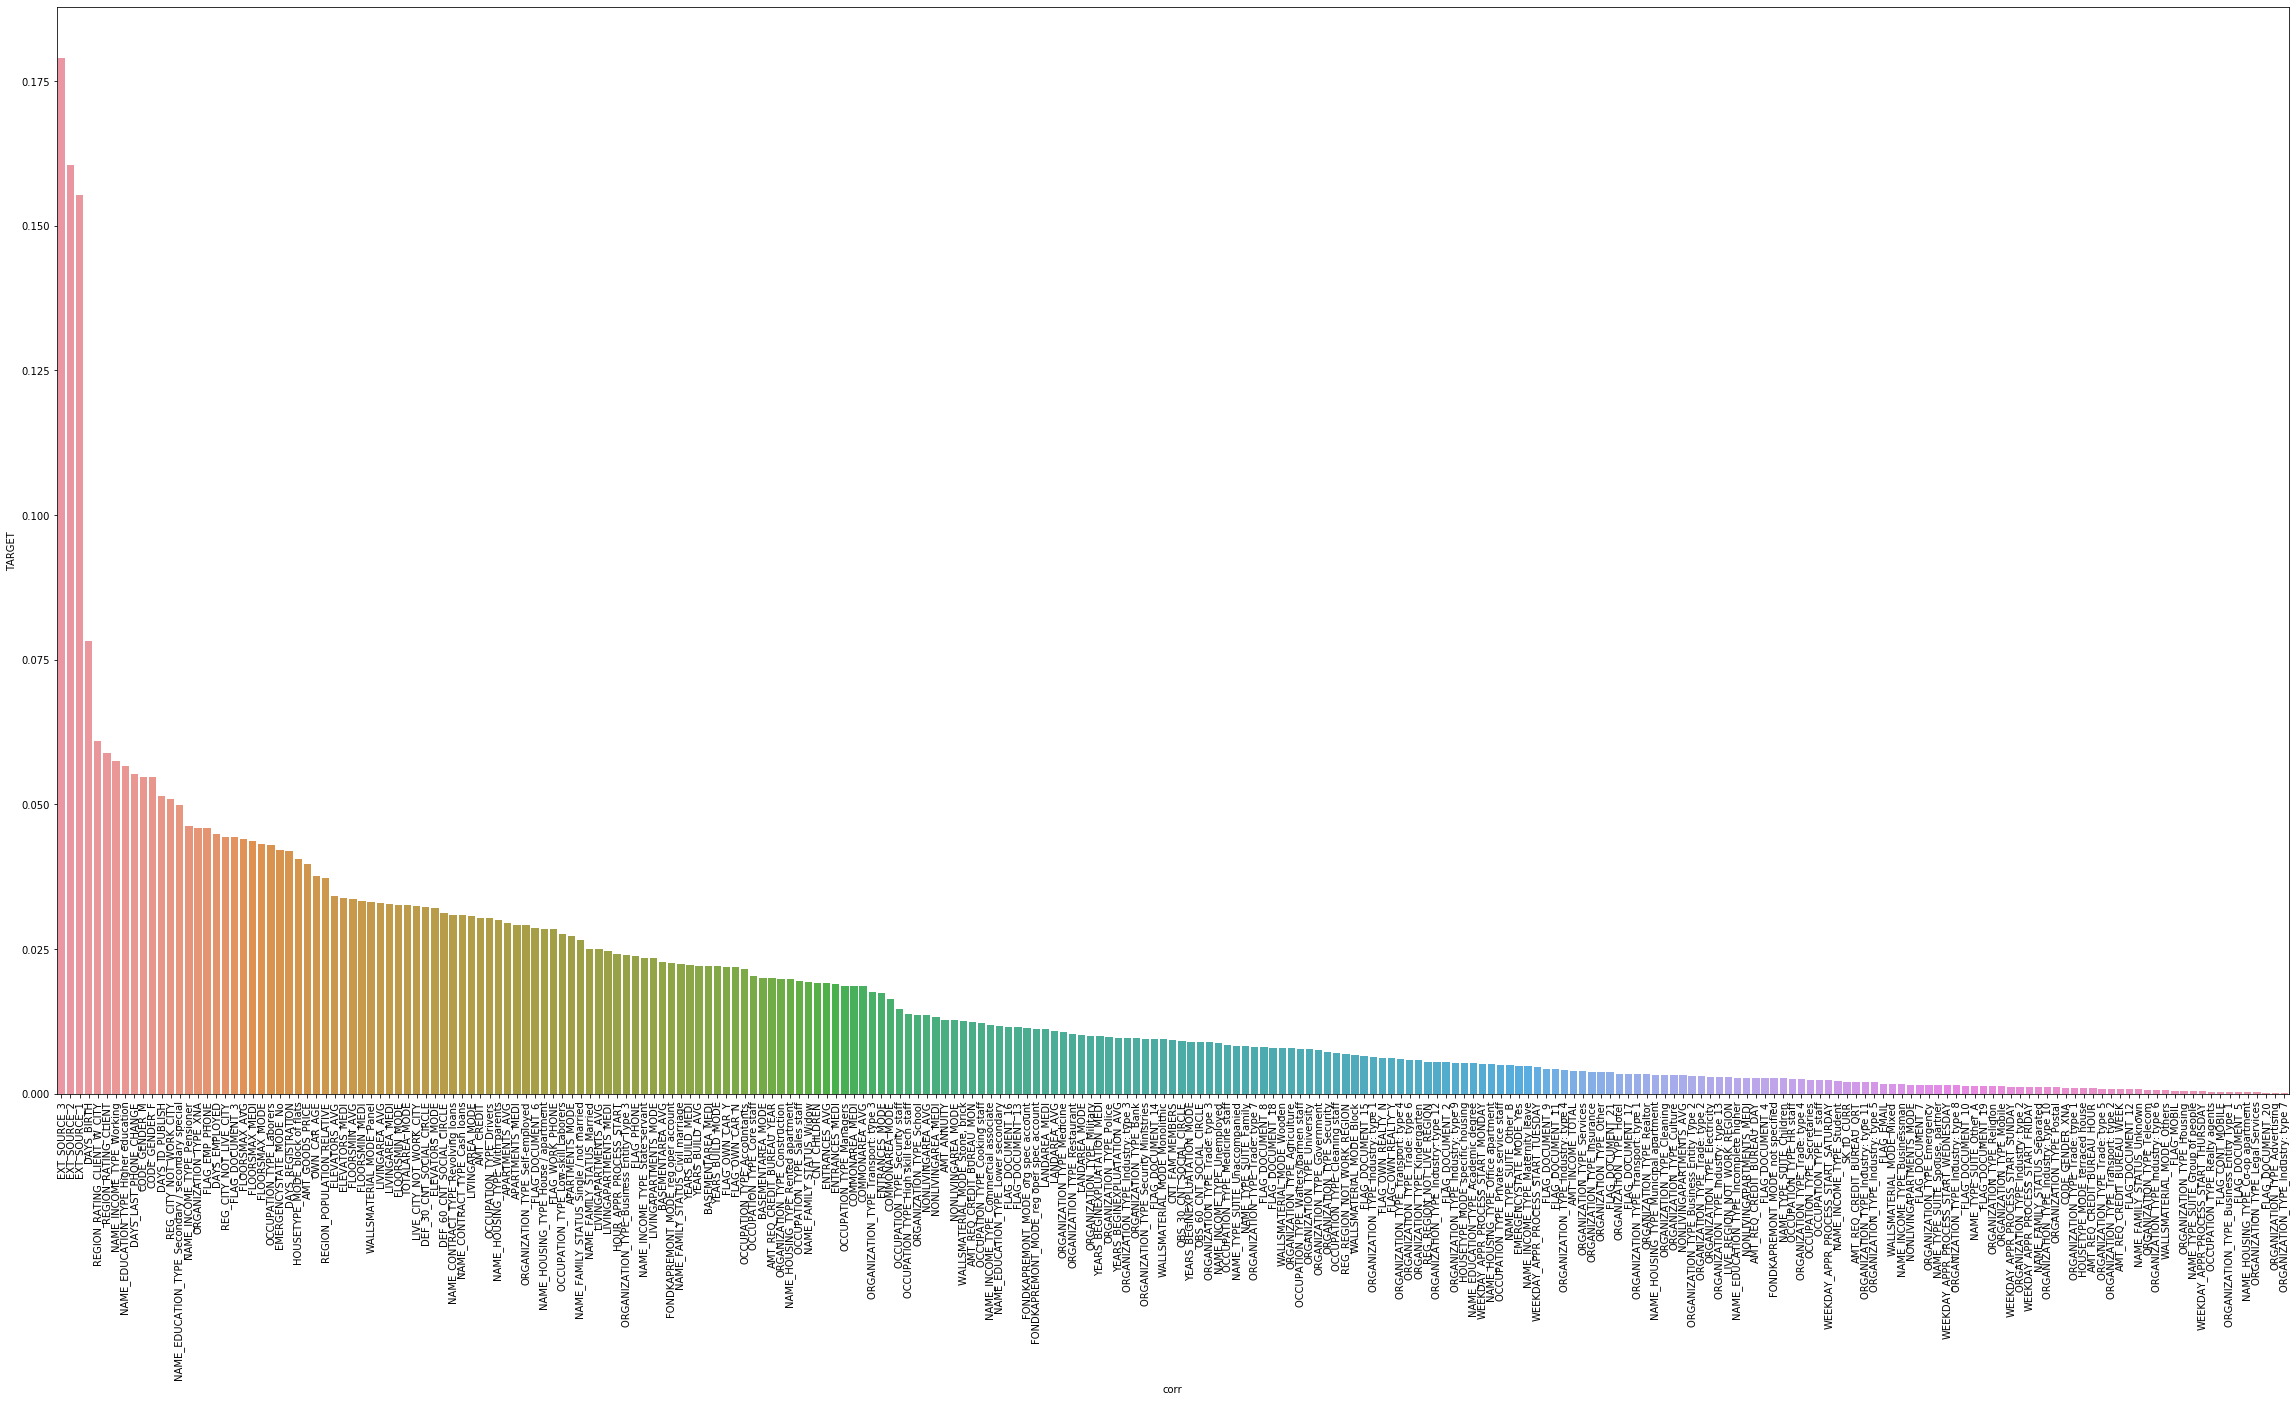

In [100]:
fig = plt.figure(1,figsize=(40,20))
sns.barplot(data=targetvar_sorted.iloc[1:,:],x="corr",y="TARGET")
plt.xticks(rotation=90)

In [101]:
#平均値補完

from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN',strategy='mean',axis=0)
mean_imr = imr.fit(ohe_df.values)
mean_data = imr.transform(ohe_df.values)
mean_data

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[1.00002e+05, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.00003e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.00004e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [4.56253e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [4.56254e+05, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [4.56255e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [106]:
mean_data_df = pd.DataFrame(data=mean_data,columns=ohe_df.columns)
mean_data_df.head()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


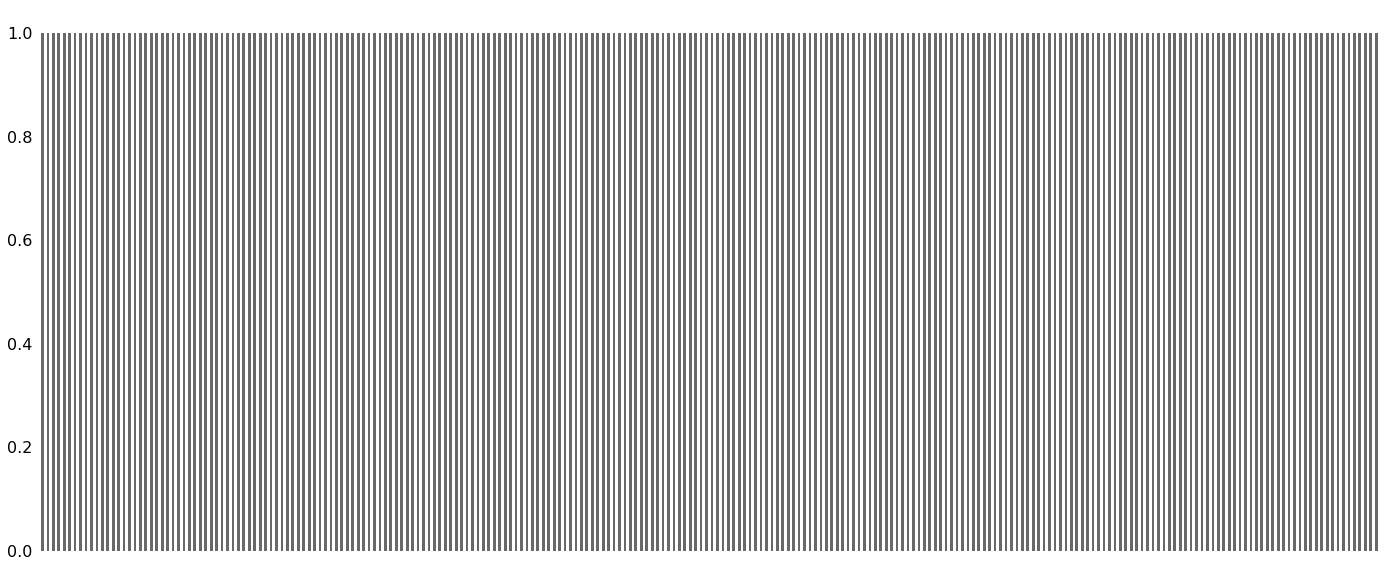

In [108]:
msno.bar(mean_data_df)

In [66]:
ohe_corr['corr'] = ohe_corr.columns
ohe_corr[]
#ohe_corr['TARGET'].sort_vlaues(ascending=False)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,corr
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.002073,-0.000976,0.000072,-0.001396,0.002300,-1.280782e-03,-0.000270,0.000510,0.002549,SK_ID_CURR
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.006777,-0.001713,-0.009384,0.000628,-0.033119,-1.265666e-02,0.007946,-0.042201,0.004829,TARGET
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,-0.005272,-0.000709,0.001607,-0.002032,-0.020892,-2.508821e-02,0.011036,-0.038644,0.004525,CNT_CHILDREN
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.011696,0.006149,0.023886,0.003886,0.032753,1.652333e-02,-0.003369,0.050174,-0.002894,AMT_INCOME_TOTAL
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.014314,0.007987,0.027255,0.005799,0.046644,9.756049e-03,-0.007373,0.058256,-0.004308,AMT_CREDIT
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,...,0.015589,0.010077,0.035318,0.005968,0.054988,9.188742e-03,-0.007711,0.068145,-0.003910,AMT_ANNUITY
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,...,0.013696,0.009955,0.028315,0.005877,0.049759,1.288831e-02,-0.009135,0.062878,-0.004848,AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,...,0.078062,0.016288,0.045775,0.013435,0.092652,1.078225e-02,-0.056263,0.103513,-0.029932,REGION_POPULATION_RELATIVE
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,...,-0.006749,-0.000262,0.004421,-0.000690,-0.013597,-1.096440e-02,0.008758,-0.019852,0.005434,DAYS_BIRTH
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,0.003691,-0.003692,-0.006892,-0.003120,-0.004193,-6.326739e-03,-0.002846,-0.010907,-0.003571,DAYS_EMPLOYED


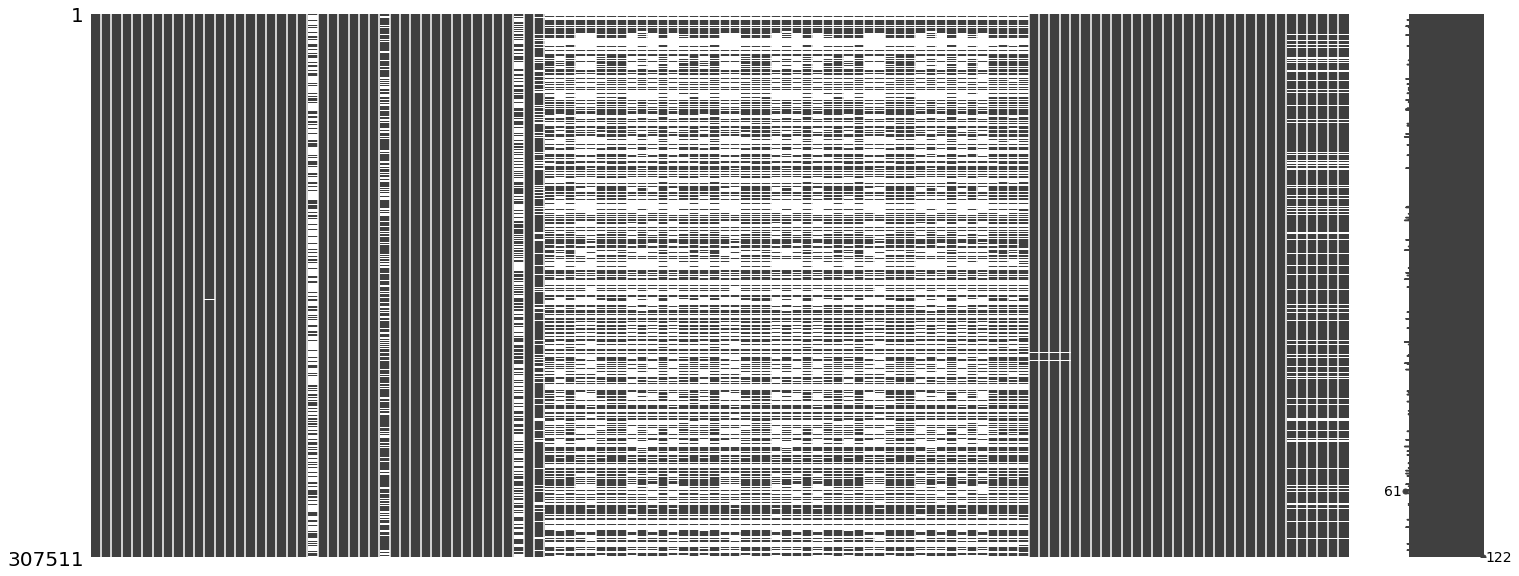

In [11]:
import missingno as msno
msno.matrix(df)

In [13]:
df_corr = df.corr()

In [26]:
print(df_corr.head())
df_columns = df_corr.columns
df_columns

                  SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR          1.000000 -0.002108     -0.001129         -0.001820   
TARGET             -0.002108  1.000000      0.019187         -0.003982   
CNT_CHILDREN       -0.001129  0.019187      1.000000          0.012882   
AMT_INCOME_TOTAL   -0.001820 -0.003982      0.012882          1.000000   
AMT_CREDIT         -0.000343 -0.030369      0.002145          0.156870   

                  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR         -0.000343    -0.000433        -0.000232   
TARGET             -0.030369    -0.012817        -0.039645   
CNT_CHILDREN        0.002145     0.021374        -0.001827   
AMT_INCOME_TOTAL    0.156870     0.191657         0.159610   
AMT_CREDIT          1.000000     0.770138         0.986968   

                  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  ...  \
SK_ID_CURR                          0.000849   -0.001500       0.001366  ...   
TARGET                

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'corr'],
      dtype='object', length=107)

In [27]:
corr_target = df_corr.iloc[:,1]
corr_target.head()
corr_target['col'] = df_columns
corr_target
corr_target.shape

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(107,)

In [35]:
df_corr = df.corr()
df_corr
corr_columns = df_corr.columns
corr_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [36]:
df_corr['corr'] = corr_columns
target_corr= df_corr.loc[:,['corr','TARGET']]
target_corr.head()

,corr,TARGET
SK_ID_CURR,SK_ID_CURR,-0.002108
TARGET,TARGET,1.000000
CNT_CHILDREN,CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,-0.003982
AMT_CREDIT,AMT_CREDIT,-0.030369


In [37]:
target_corr['TARGET'] = np.abs(target_corr.iloc[:,1])
target_corr.head()


,corr,TARGET
SK_ID_CURR,SK_ID_CURR,0.002108
TARGET,TARGET,1.000000
CNT_CHILDREN,CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,0.003982
AMT_CREDIT,AMT_CREDIT,0.030369


In [97]:
type(target_corr)

pandas.core.frame.DataFrame

In [38]:
df_c = target_corr.sort_values('TARGET', ascending=False)
df_c = pd.DataFrame(data=df_c)
type(df_c)

pandas.core.frame.DataFrame

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104]), <a list of 105 Text xticklabel objects>)

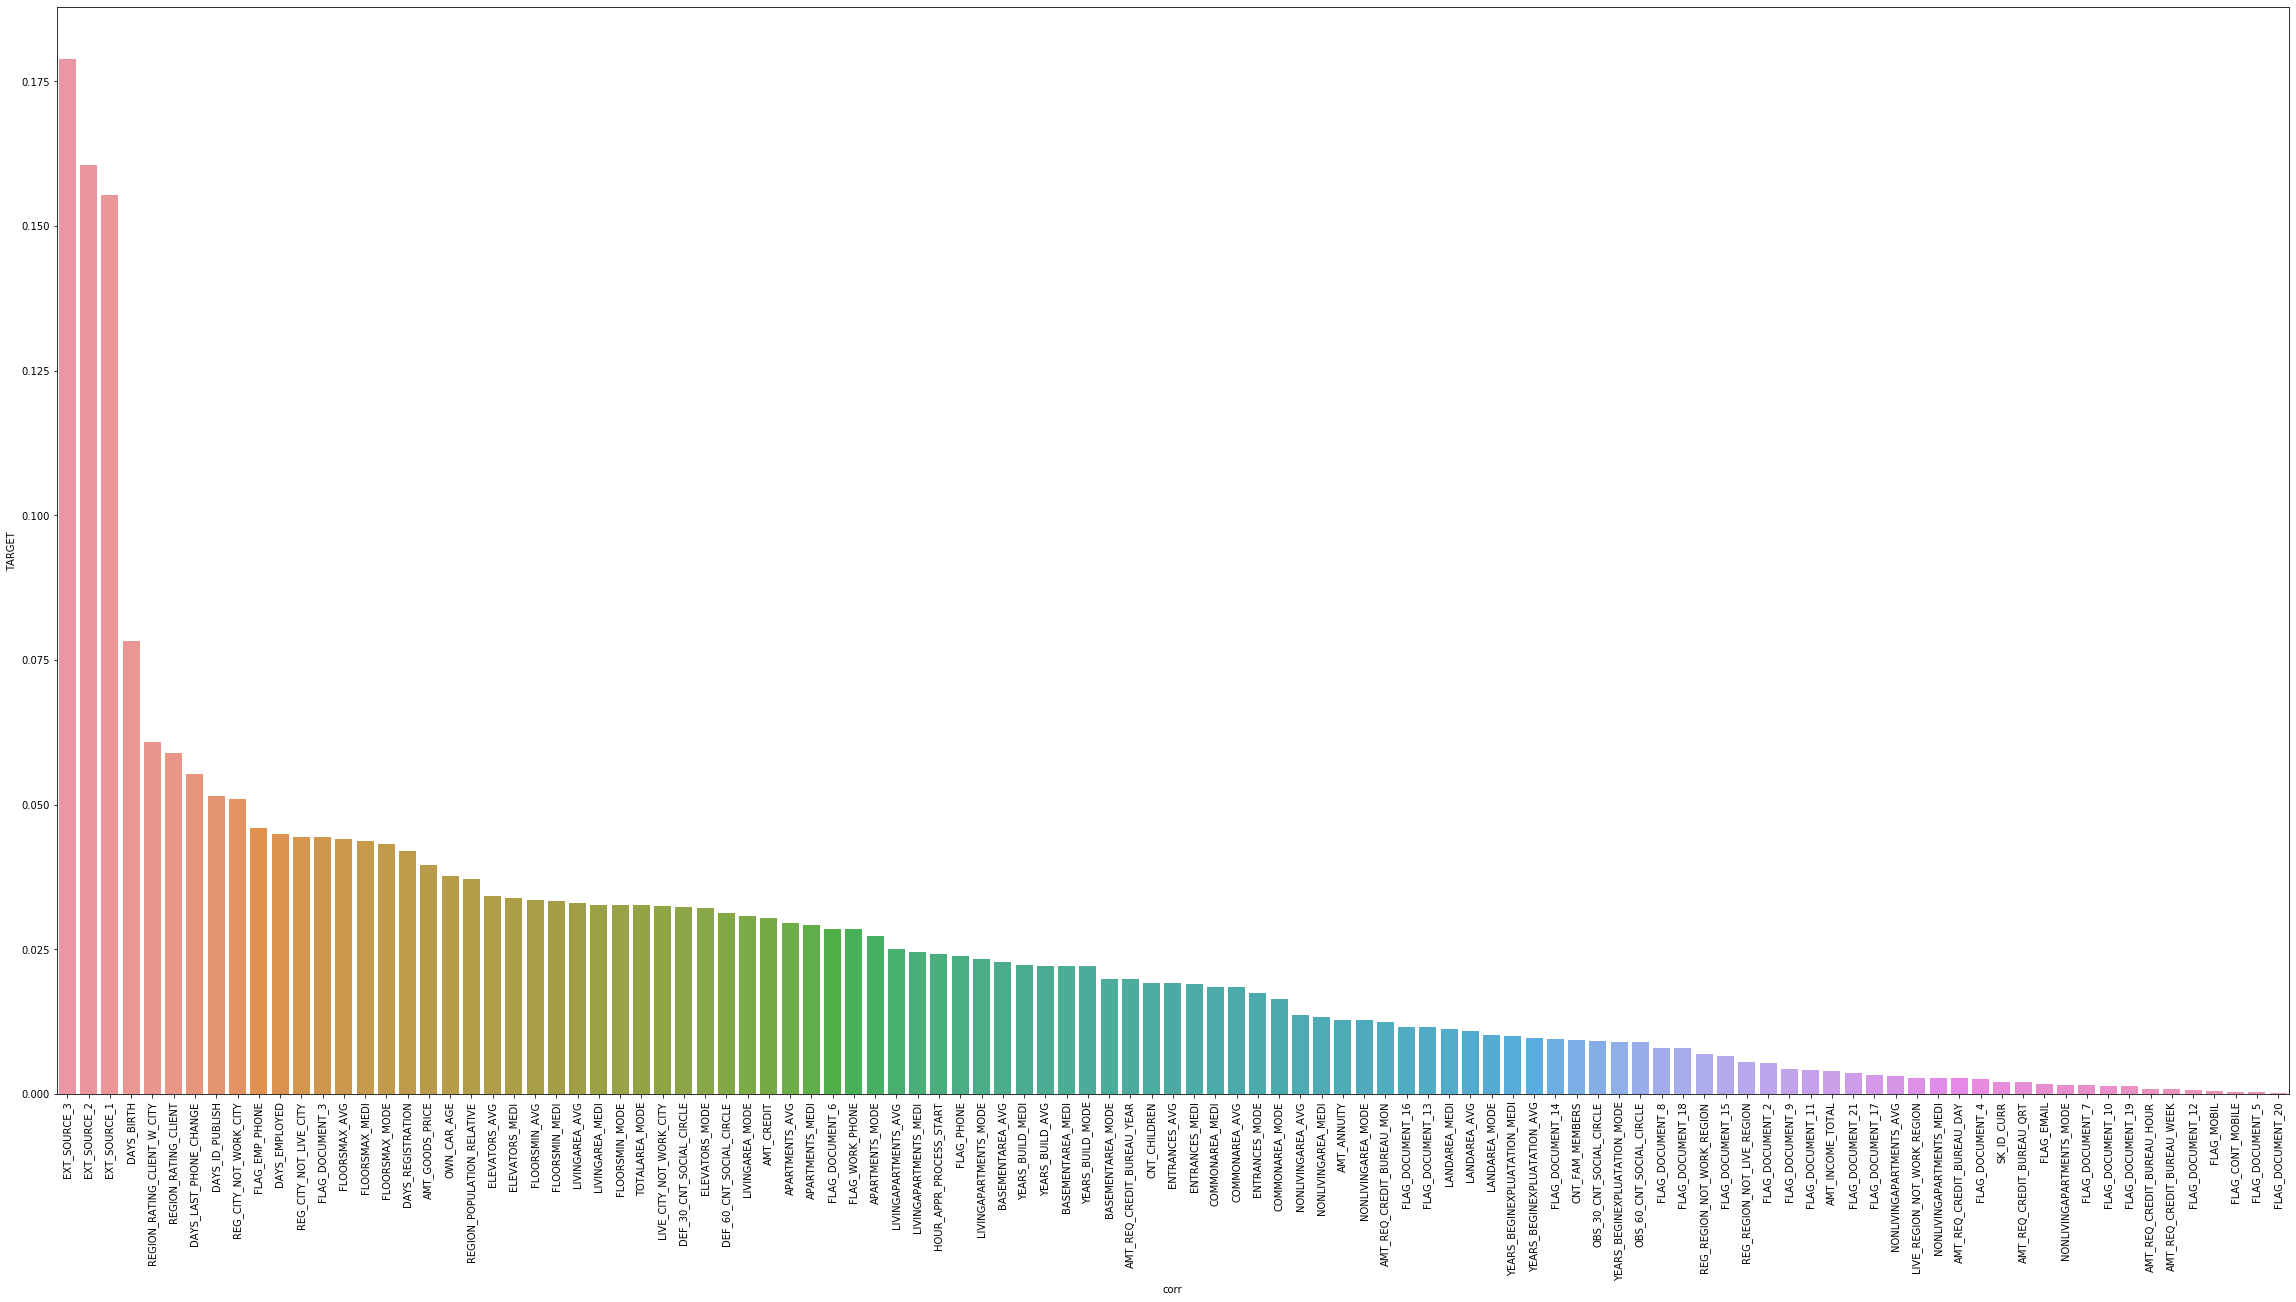

In [39]:
fig = plt.figure(1,figsize=(40,20))
sns.barplot(data=df_c.iloc[1:,:],x="corr",y="TARGET")
plt.xticks(rotation=90)

corr      FLOORSMIN_AVG
TARGET        0.0336135
Name: FLOORSMIN_AVG, dtype: object


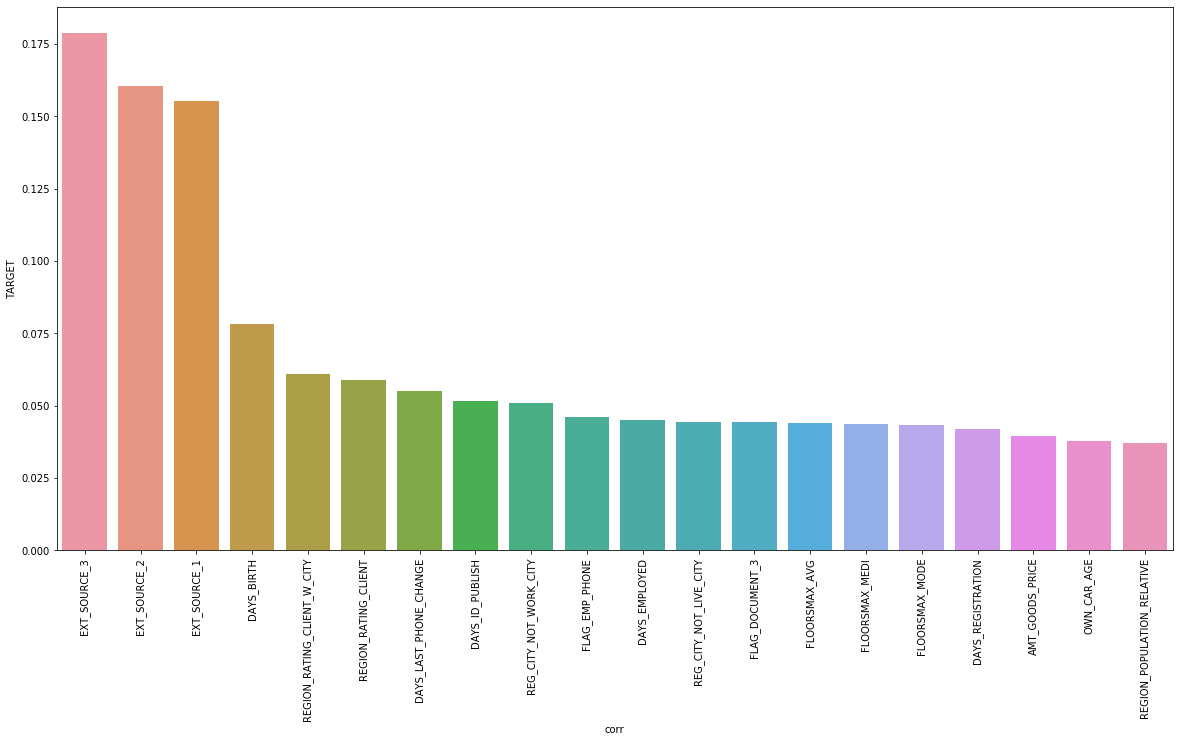

In [54]:
fig = plt.figure(1,figsize=(20,10))
top20_data = df_c.iloc[1:21,:]
sns.barplot(data=top20_data,x="corr",y="TARGET")
plt.xticks(rotation=90)
top20_data.shape
print(df_c.iloc[23,])

# 欠損の割合調査

In [121]:
#欠損の割合調査
ext1_percent = ohe_df.loc[:,'EXT_SOURCE_1'].isnull().sum()/ohe_df.shape[0]*100
ext2_percent = ohe_df.loc[:,'EXT_SOURCE_2'].isnull().sum()/ohe_df.shape[0]*100
ext3_percent = ohe_df.loc[:,'EXT_SOURCE_3'].isnull().sum()/ohe_df.shape[0]*100

print('EXT_SOURCE_1の欠損値の割合:{:.2f}%'.format(ext1_percent))
print('EXT_SOURCE_2の欠損値の割合:{:.2f}%'.format(ext2_percent))
print('EXT_SOURCE_3の欠損値の割合:{:.2f}%'.format(ext3_percent))

EXT_SOURCE_1の欠損値の割合:56.38%
EXT_SOURCE_2の欠損値の割合:0.21%
EXT_SOURCE_3の欠損値の割合:19.83%


# EXT_SOURCE_1と相関の高い変数を探索する

In [132]:
def make_corr(var_name):
    df_corr['corr'] = corr_columns
    var_corr= df_corr.loc[:,['corr',var_name]]
    #ex3_corr.head()
    var_corr[var_name] = np.abs(var_corr.iloc[:,1])
    var_corr.head()
    df_var = var_corr.sort_values(var_name, ascending=False)
    df_var = pd.DataFrame(data=df_var)
    return df_var
    

In [133]:
def make_gragh(df_var,var_name):
    
    fig = plt.figure(1,figsize=(20,10))
    top20_var = df_var.iloc[1:21,:]
    sns.barplot(data=top20_var,x="corr",y=var_name)
    plt.xticks(rotation=90)

In [134]:
ex1_corr_df = make_corr('EXT_SOURCE_1')
ex1_corr_df.head()

,corr,EXT_SOURCE_1
EXT_SOURCE_1,EXT_SOURCE_1,1.000000
DAYS_BIRTH,DAYS_BIRTH,0.600610
FLAG_EMP_PHONE,FLAG_EMP_PHONE,0.294147
DAYS_EMPLOYED,DAYS_EMPLOYED,0.289848
EXT_SOURCE_2,EXT_SOURCE_2,0.213982


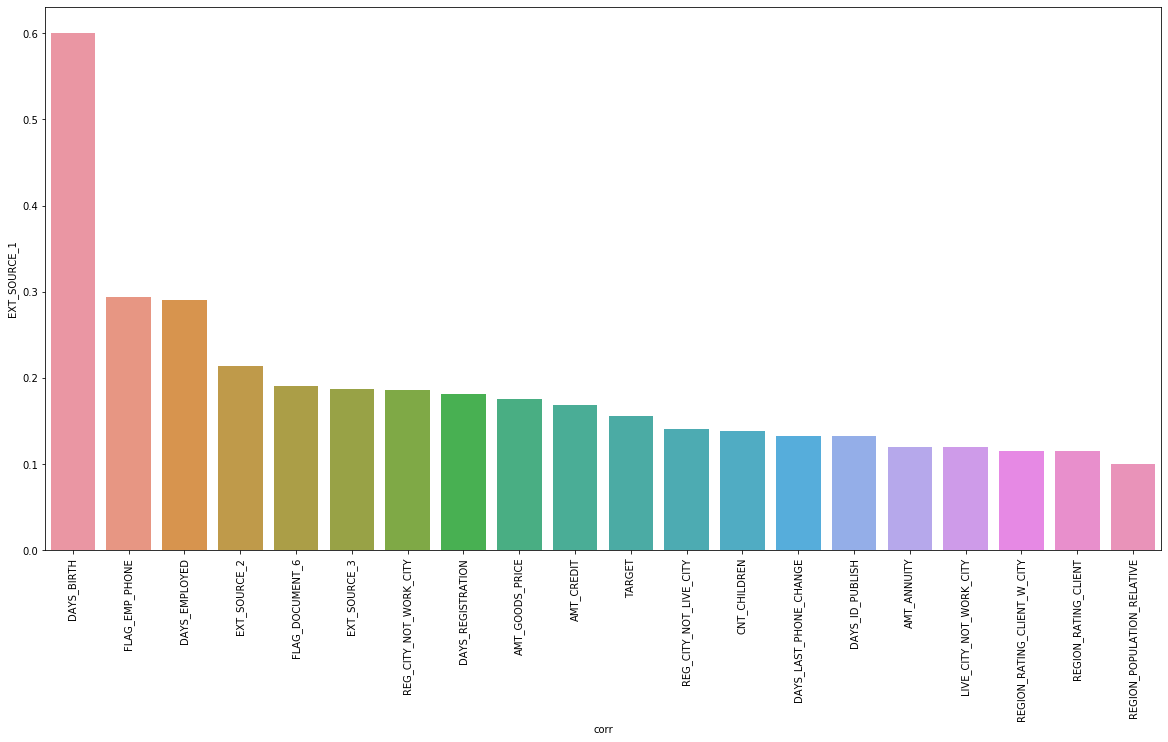

In [135]:
make_gragh(ex1_corr_df, 'EXT_SOURCE_1')

In [136]:
ex2_corr_df = make_corr('EXT_SOURCE_2')
ex2_corr_df.head()

,corr,EXT_SOURCE_2
EXT_SOURCE_2,EXT_SOURCE_2,1.000000
REGION_RATING_CLIENT,REGION_RATING_CLIENT,0.292895
REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_W_CITY,0.288299
EXT_SOURCE_1,EXT_SOURCE_1,0.213982
REGION_POPULATION_RELATIVE,REGION_POPULATION_RELATIVE,0.198924


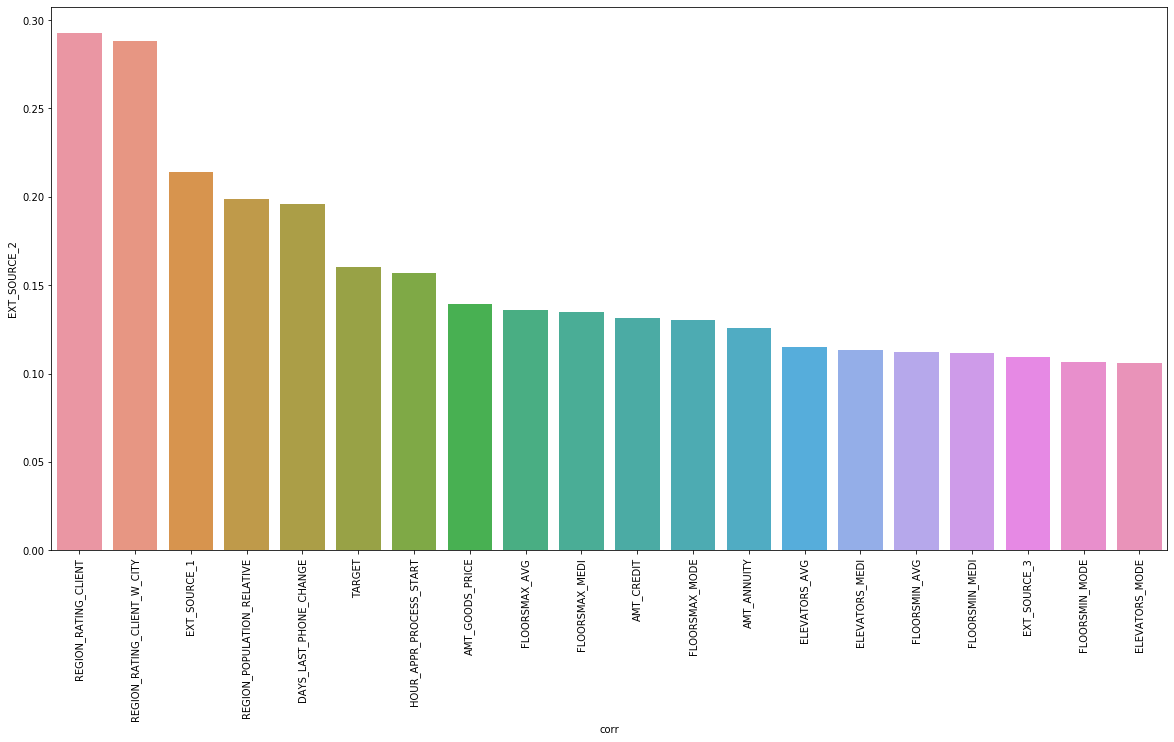

In [137]:
make_gragh(ex2_corr_df, 'EXT_SOURCE_2')


In [138]:
df_corr['corr'] = corr_columns
ex3_corr= df_corr.loc[:,['corr','EXT_SOURCE_3']]
ex3_corr.head()
ex3_corr['EXT_SOURCE_3'] = np.abs(ex3_corr.iloc[:,1])
ex3_corr.head()
df_ex3 = ex3_corr.sort_values('EXT_SOURCE_3', ascending=False)
df_ex3 = pd.DataFrame(data=df_ex3)
#type(df_ex3)

corr            DEF_30_CNT_SOCIAL_CIRCLE
EXT_SOURCE_3                   0.0362526
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: object


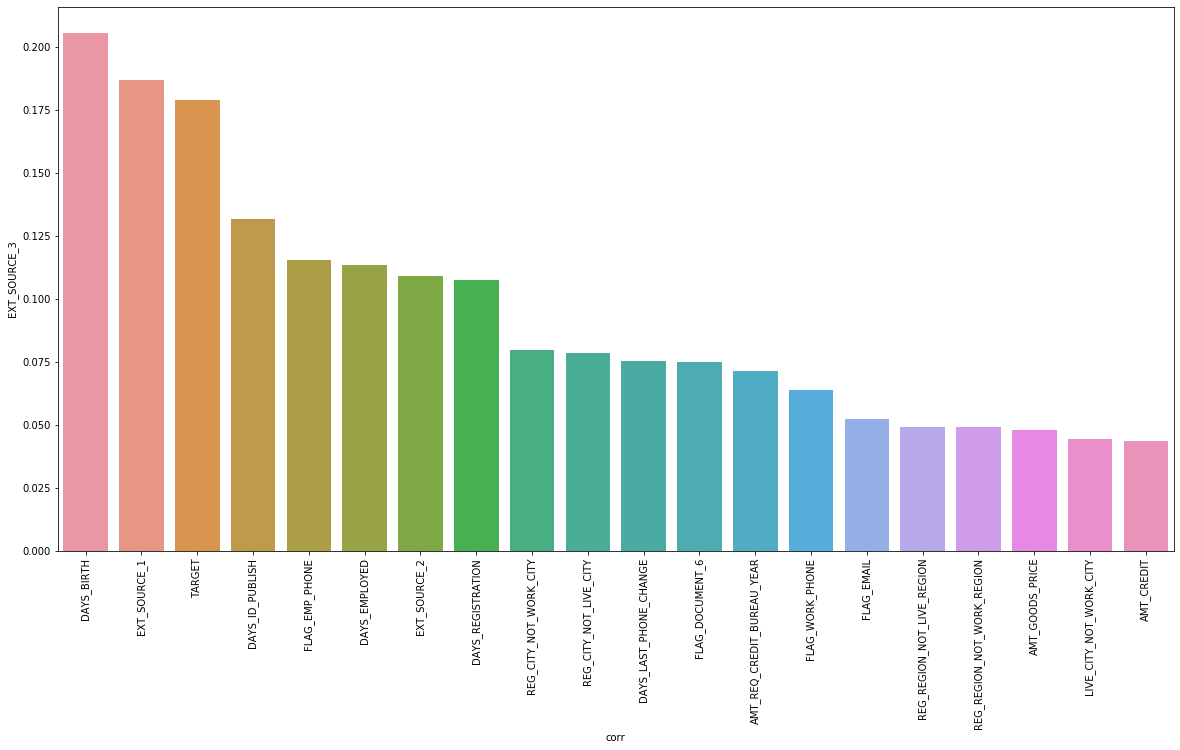

In [139]:
fig = plt.figure(1,figsize=(20,10))
top20_ex3 = df_ex3.iloc[1:21,:]
sns.barplot(data=top20_ex3,x="corr",y="EXT_SOURCE_3")
plt.xticks(rotation=90)
top20_ex3.shape
print(df_ex3.iloc[23,])

# ここまでのまとめ

EXT_SOURCE_1の欠損値が56%を占めていて、この欠損値補完を考える。
この欠損値を補完すると方法として、相関性の高い変数を活用することを考える。
そのため、まず相関の高い変数を上記で分析した結果DayBirthの相関が0.6であり、
とても高い相関であった。
従って、この変数を欠損値補完に活用する


# DayBirth、EXT_SOURCE_1のデータによる特徴量エンジニアリング

In [143]:
ohe_df.loc[:,'DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [146]:
from sklearn.preprocessing import StandardScaler

In [160]:
sc = StandardScaler()
array_daybirth = np.array(ohe_df.loc[:,'DAYS_BIRTH'])
array_daybirth = array_daybirth.reshape(-1,1)
array_daybirth.shape



(307511, 1)

In [161]:
sc_daybirth = sc.fit(array_daybirth)

In [165]:
daybirth_stadard = sc_daybirth.transform(array_daybirth)
daybirth_stadard

array([[ 1.50687967],
       [-0.16682127],
       [-0.68950909],
       ...,
       [ 0.24541696],
       [ 0.93400832],
       [-0.18767379]])

In [166]:
array_ext1 = np.array(ohe_df.loc[:,'EXT_SOURCE_1'])
array_ext1 = array_ext1.reshape(-1,1)
array_ext1.shape

(307511, 1)

In [167]:
sc_ext1 = sc.fit(array_ext1)
ext1_standard = sc_ext1.transform(array_ext1)
ext1_standard

array([[-1.98564358],
       [-0.90429817],
       [        nan],
       ...,
       [ 1.14609551],
       [        nan],
       [ 1.10076875]])

In [177]:
ext1_standard[2]


array([nan])

In [184]:
count = 0
for ext1, day in zip(ext1_standard,daybirth_stadard ):
    if ext1 == np.nan:
        print(count)
        #ext1_standard[count] = day
    count+=1
#print(ext1_standard)

In [185]:
print(np.nan)


nan


In [186]:
type(np.nan)

float